<a href="https://colab.research.google.com/github/H1103/Project-119-Decision-Tree/blob/main/Project_119_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
datatoload = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
import plotly.express as px

col_names = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Survived']
df = pd.read_csv('titanic.csv',names= col_names).iloc[1:]
print(df.head())

  PassengerId Pclass Sex   Age SibSp Parch Survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [ ]:
features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch']
X = df[features]
y = df.Survived

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy is  68.65671641791045


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file= dot_data, filled= True, rounded= True, special_characters= True, class_names=["0","1"])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>2</SUB> &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<X<SUB>1</SUB> &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>3</SUB> &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<X<SUB>0</SUB> &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<X<SUB>0</SUB> &le; 294.5<br/>gini

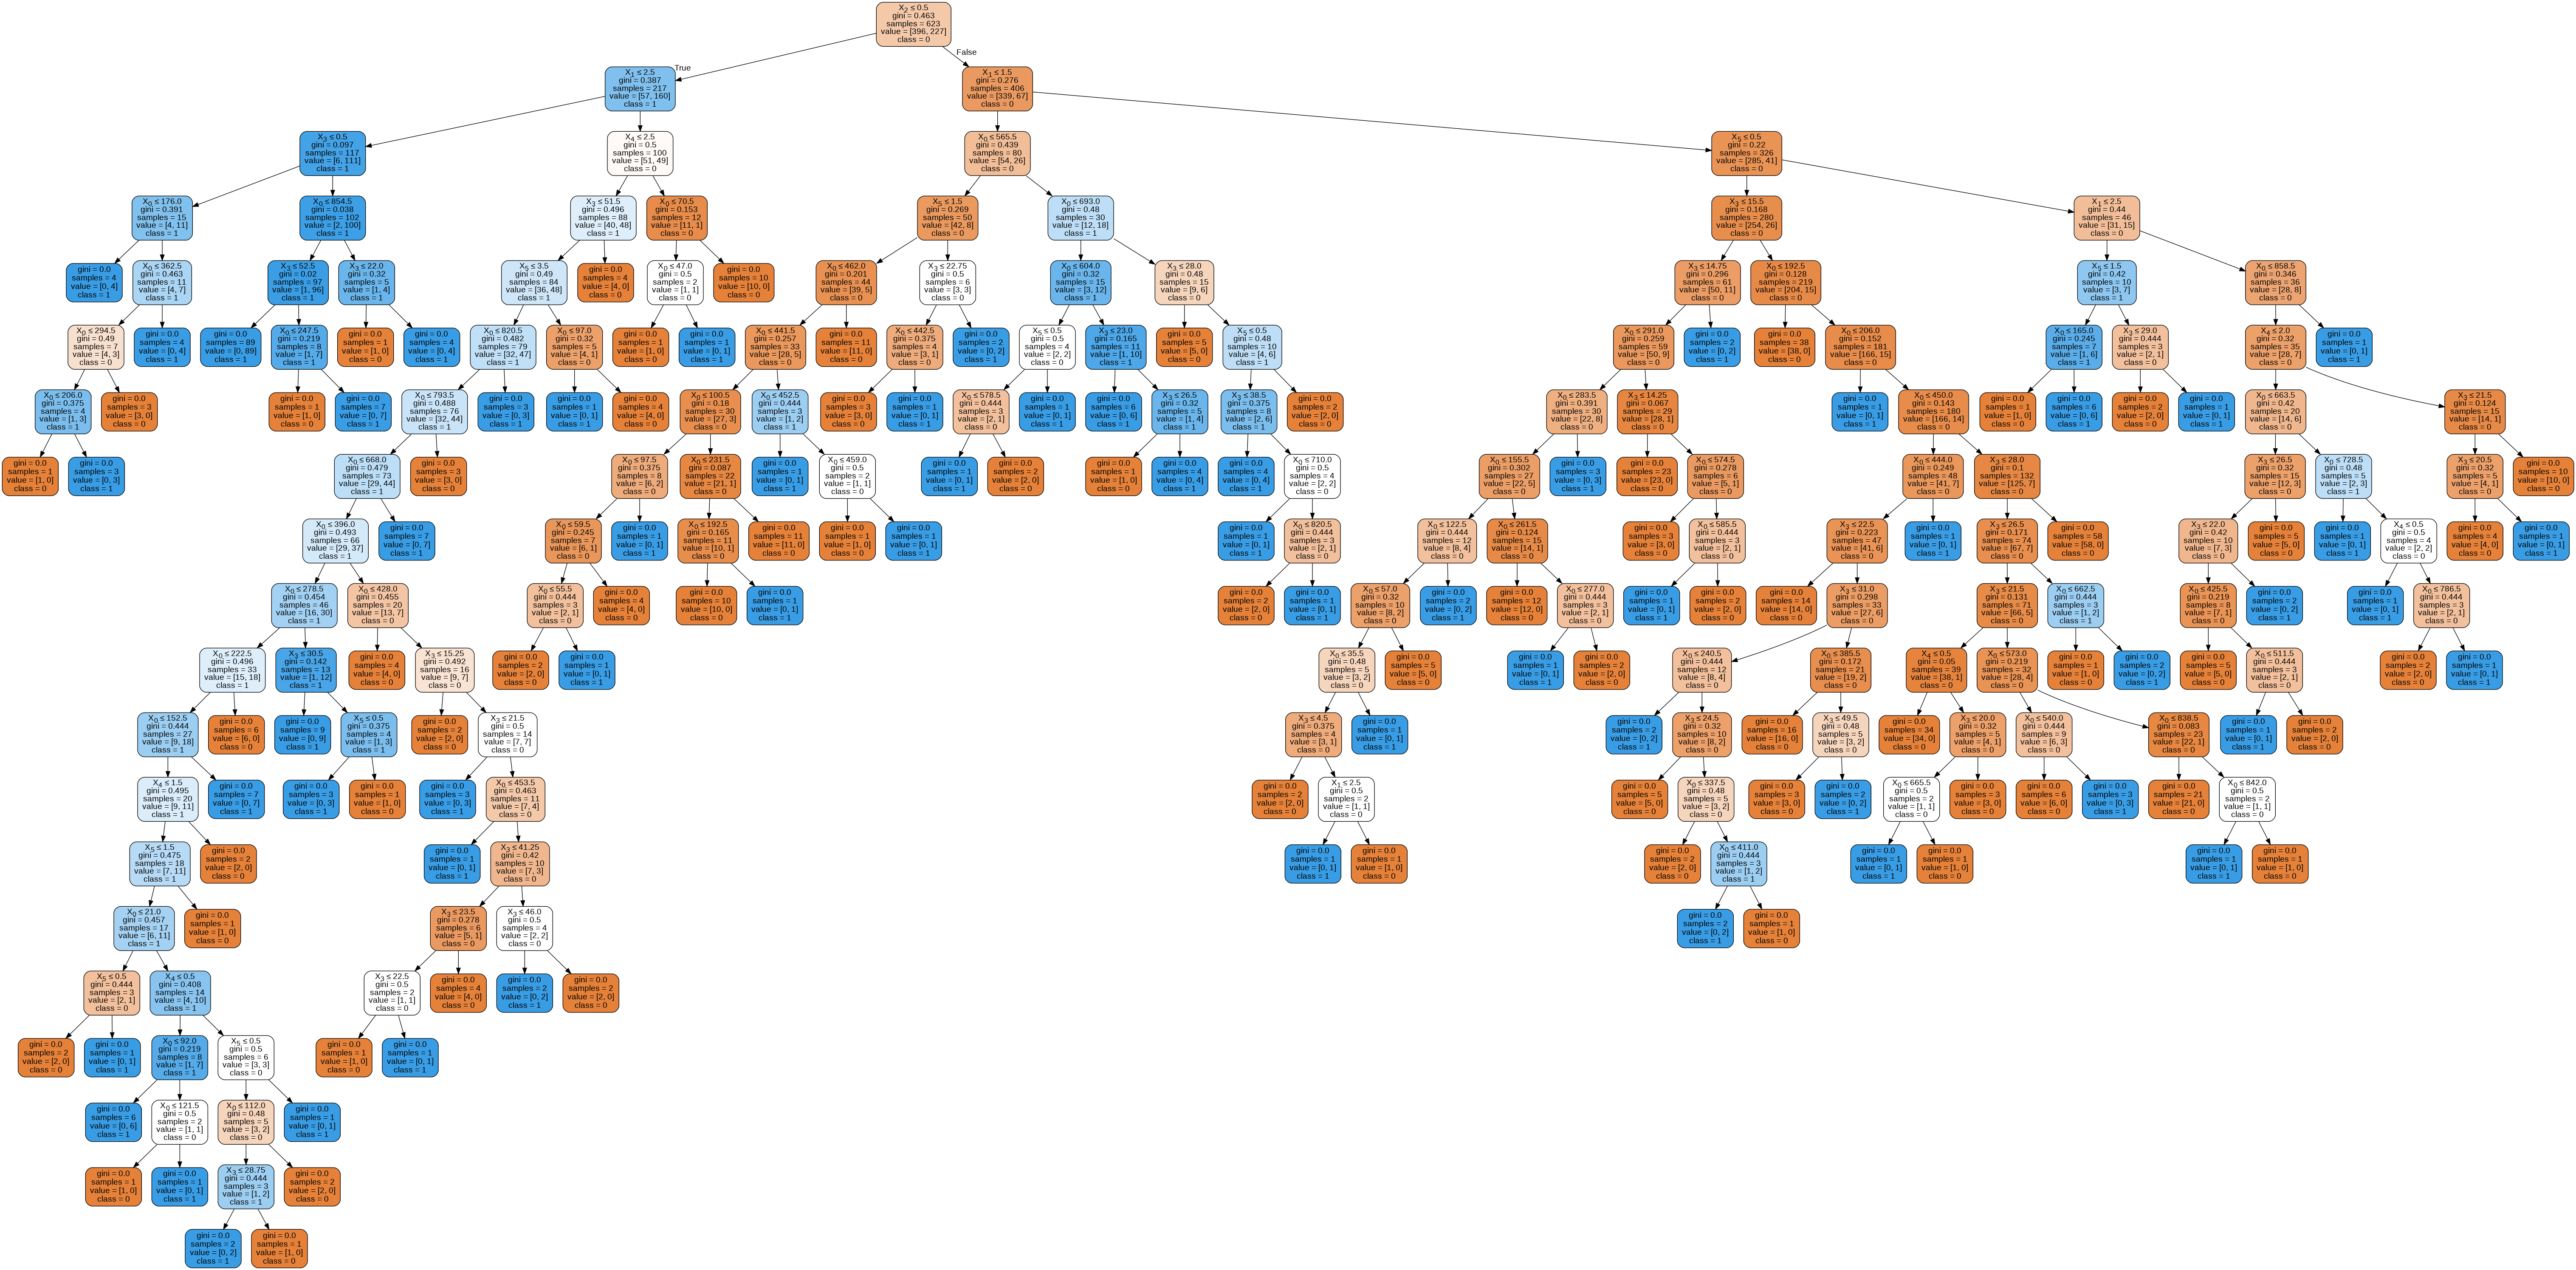

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
clf = DecisionTreeClassifier(max_depth= 3)
clf = clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)
print("Accuracy is ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy is  74.6268656716418


In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.038<br/>samples = 102<br/>value = [2, 100]<br/>class = 1>, fillcolor="#3d9fe6"] ;
2 -> 4 ;
5 [label=<SibSp &le; 2.5<br/>gini = 0.5<br/>samples = 100<br/>value = [51, 49]<br/>class = 0>, fillcolor="#fefaf7"] ;
1 -> 5 ;
6 [label=<gini = 0.496<br/>samples = 88<br/>value = [40, 48]<br/>class = 1>, fillcolor="#deeffb"] ;
5 

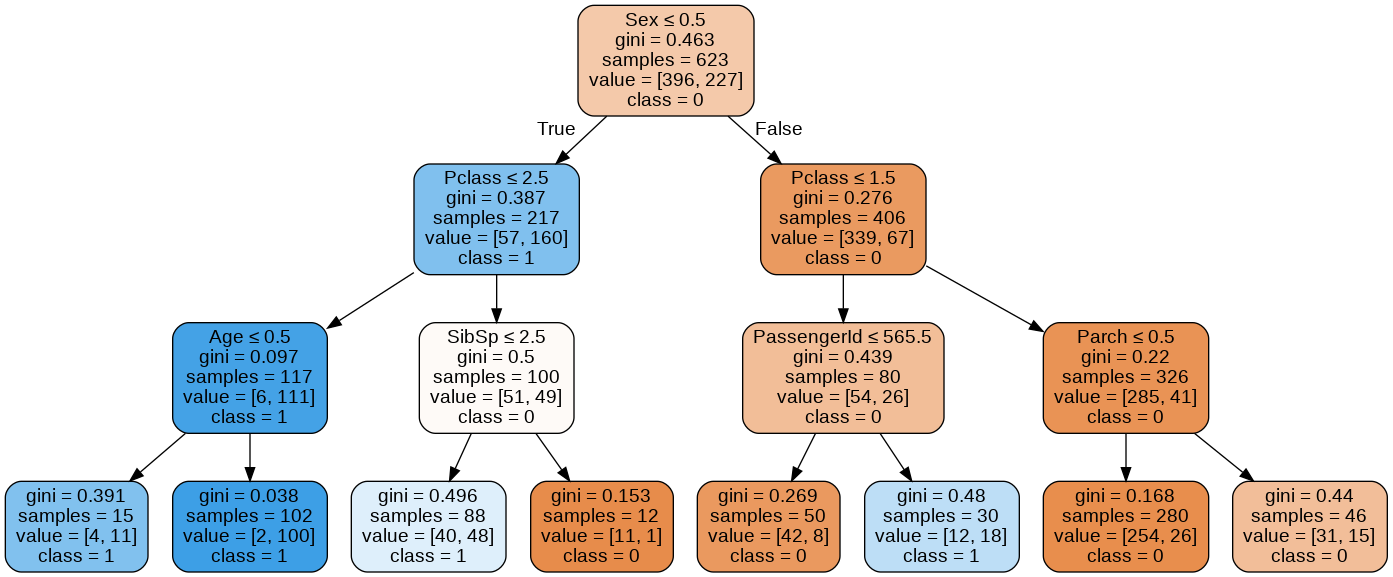

In [ ]:
dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

with 74% accuracy we can say that people with the Age ≤ 0.5 and Pclass ≤ 2.5 are more likely to survive.

